# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

In [3]:
sorted_indices = np.argsort(mini_train_labels)
mini_train_srted = mini_train_data[sorted_indices]
mini_labels_srted = mini_train_labels[sorted_indices]


def indices_per_digit(num_examples):
    """This function finds the first 10 indices per digit in the mini training label set."""
    example_indices = np.array([])
    for i in range(num_examples):
        num_string = str(i)
        digit_indices = np.where(mini_labels_srted == num_string)[0]
        first_10indices = digit_indices[:10]
        example_indices = np.append(example_indices, first_10indices)
    return list(example_indices)


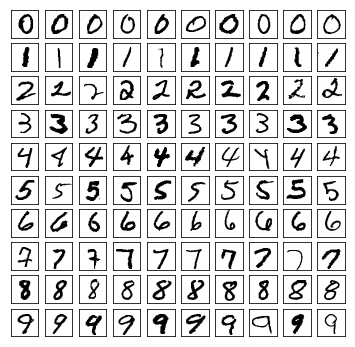

In [4]:
#def P1(num_examples=10):

### STUDENT START ###
#To ease the process of find ten examples of each digit, I first sorted the mini training dataset.
sorted_indices = np.argsort(mini_train_labels)
mini_train_srted = mini_train_data[sorted_indices]
mini_labels_srted = mini_train_labels[sorted_indices]


def indices_per_digit(num_examples):
    """This function finds the first 10 indices per digit in the mini training label set."""
    example_indices = np.array([])
    for i in range(num_examples):
        num_string = str(i)
        digit_indices = np.where(mini_labels_srted == num_string)[0]
        first_10indices = digit_indices[:10]
        example_indices = np.append(example_indices, first_10indices)
    return list(example_indices)


def P1(num_examples=10):
    #Create 10 arrays of label indices per digit to be used to index through the ordered mini training set.
    example_indices = indices_per_digit(num_examples) 
    int_indices = [ int(x) for x in example_indices ]
    #Loop through the ordered mini training set to create example images for each digit
    plt.figure(figsize=(6,6))
    for j in range(100):        
        example_digit = mini_train_srted[int_indices][j].reshape(28,28)
        plt.subplot(10,10,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(example_digit, cmap=plt.cm.binary)
    return plt.show()
    
P1(10)
### STUDENT END ###

#P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
#def P2(k_values):

### STUDENT START ###
#Function that generates a k_Nearest-Neighbors model and classifcation report for
#the given value of k, training data/labels, and test/dev data/labels
def knn_score(num, train_set, train_labels, test_set, test_labels):
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(train_set, train_labels)
    score = knn.score(test_set, test_labels)
    return score

def knn_model(num, train_set, train_labels, test_set, test_labels):
    knn = KNeighborsClassifier(n_neighbors = num)
    knn.fit(train_set, train_labels)
    knn_predict = knn.predict(test_set)
    knn_report = classification_report(test_labels, knn_predict)
    return knn_report

k = [1,3,5,7,9]
knn_mini_scores = []
for num in k:
    model_score = knn_score(num, mini_train_data, mini_train_labels, dev_data, dev_labels)
    knn_mini_scores.append(model_score)

knn1_example = knn_model(1, mini_train_data, mini_train_labels, dev_data, dev_labels)

print("The accuracy for each model for k=[1,3,5,7,8]: {d}".format(d = knn_mini_scores))
print(knn1_example)
    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

The accuracy for each model for k=[1,3,5,7,8]: [0.884, 0.876, 0.882, 0.877, 0.875]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

   micro avg       0.88      0.88      0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000



ANSWER: The most difficult number to identify is 8.

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
#def P3(train_sizes, accuracies):

### STUDENT START ###
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
time_taken = []
for size in train_sizes:
    model_start_time = time.time()
    model_score = knn_score(1, train_data[:size], train_labels[:size], dev_data, dev_labels)
    model_end_time = time.time()
    accuracies.append(model_score)
    time_taken.append(model_end_time - model_start_time)

print("The accuracy for each model according to increasing training size is: '{g}'".format(g = accuracies))
print("The time taken per model according to increasing training size is: '{h}'".format(h = time_taken))
### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#accuracies = []
#P3(train_sizes, accuracies)

The accuracy for each model according to increasing training size is: '[0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]'
The time taken per model according to increasing training size is: '[0.20744037628173828, 0.40726423263549805, 0.8682897090911865, 1.6959316730499268, 3.214399814605713, 6.388356924057007, 14.601245641708374, 32.12454891204834, 63.986788749694824]'


In [7]:
sum(time_taken)

123.49426603317261

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

In [8]:
#Transform accuracies from Part 3 using the formula odds(y) = y/(1-y) to work with number values greater than decimal values
odds_accuracies = []
for num in accuracies:
    transformed_accuracy = num/(1-num)
    odds_accuracies.append(transformed_accuracy)


In [9]:
#Log transform the size of the training dataset, since accuracy increases logarithmically with training dataset size
log_train_sizes = np.log(train_sizes)

In [10]:
#Reshaped transformed training size data, accuracies, test training sizes to 2d matrices
train_size_reshaped = np.array(log_train_sizes).reshape(-1,1)
accuracies_reshaped = np.array(odds_accuracies).reshape(-1,1)
lin_test = np.array([60000, 120000, 1000000]).reshape(-1,1)

#Create a linear regression model to predict accuracies for larger training dataset sizes.
lin_reg = LinearRegression()  
lin_reg.fit(train_size_reshaped, accuracies_reshaped)

#Apply linear regression model to test training sizes set
lin_test = np.log(lin_test) #Transform test training sizes to log values
y_pred = lin_reg.predict(lin_test)
y_pred

array([[26.07837794],
       [28.93291195],
       [37.66462802]])

The R2 value for the model is 0.9395.
The predicted accuracy values are [0.9630701660900399, 0.9665919573218424, 0.9741365674202281]


Text(0, 0.5, 'Accuracy Values (odds transformed)')

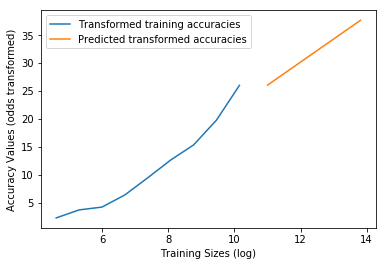

In [11]:
#def P4():

### STUDENT START ###
test_sizes = [60000,120000, 1000000]

#Transform accuracies from Part 3 using the formula odds(y) = y/(1-y) to work with number values greater than decimal values
odds_accuracies = []
for num in accuracies:
    transformed_accuracy = num/(1-num)
    odds_accuracies.append(transformed_accuracy)
    
#Log transform the size of the training dataset, since accuracy increases logarithmically with training dataset size
log_train_sizes = np.log(train_sizes)

#Reshaped transformed training size data, accuracies, test training sizes to 2d matrices
log_train_reshaped = np.array(log_train_sizes).reshape(-1,1)
odds_acc_reshaped = np.array(odds_accuracies).reshape(-1,1)

#Create a linear regression model to predict accuracies for larger training dataset sizes.
lin_reg2 = LinearRegression()  
lin_reg2.fit(log_train_reshaped, odds_acc_reshaped)

#Apply linear regression model to test training sizes set
log_test_sizes = np.log(test_sizes).reshape(-1,1) #Transform test training sizes to log values
reg_pred = lin_reg2.predict(log_test_sizes)
accuracy_predicted = []
for num in reg_pred.reshape(1,3)[0]:  #reshape data so that output is cleaner
    untransformed = num/(1+num)
    accuracy_predicted.append(untransformed)

#R2 score using LinearRegression.score(X_train, Y_train)
r2_value = round(lin_reg2.score(log_train_reshaped, odds_acc_reshaped),4)

print("The R2 value for the model is {d}.".format(d = r2_value))
print("The predicted accuracy values are {e}".format(e = accuracy_predicted))

plt.plot(log_train_sizes, odds_accuracies, label = "Transformed training accuracies")
plt.plot(log_test_sizes, reg_pred, label = 'Predicted transformed accuracies')
plt.legend(loc='upper left')
plt.xlabel("Training Sizes (log)")
plt.ylabel("Accuracy Values (odds transformed)")

### STUDENT END ###

#P4()

ANSWER: Creating a linear regression model to predict accuracy values on the untransformed training sizes and training accuracy values is wrong, because the predicted accuracy values will be much greater than 1. We need to transform both the training sizes and the training accuracy values so that the predicted values make sense.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

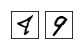

In [12]:
#To plot example images of 4 and 9, I first found the corresponding index in my sorted mini_labels dataset
four_indices = np.where(mini_labels_srted == "4")[0]
four_example = four_indices[1] #Looking at my plot for part 1, the 4 and 9 in the 2nd plot look the most similar.
nine_indices = np.where(mini_labels_srted == '9')[0]
nine_example = nine_indices[1]
example_pair = [four_example, nine_example]

plt.figure(figsize=(6,6))        
for i in range(2):   
    reshaped_pair = mini_train_srted[example_pair][i].reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reshaped_pair, cmap=plt.cm.binary)
plt.show()

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


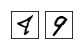

In [13]:
#def P5():

### STUDENT START ###
knn1_mini = KNeighborsClassifier(n_neighbors = 1)
knn1_mini.fit(mini_train_data, mini_train_labels)
knn1_mini_predict = knn1_mini.predict(dev_data)
knn1_mini_cmatrix = confusion_matrix(dev_labels, knn1_mini_predict)
print(knn1_mini_cmatrix)


#To plot example images of 4 and 9, I first found the corresponding index in my sorted mini_labels dataset
four_indices = np.where(mini_labels_srted == "4")[0]
four_example = four_indices[1] #Looking at my plot for part 1, the 4 and 9 in the 2nd plot look the most similar.
nine_indices = np.where(mini_labels_srted == '9')[0]
nine_example = nine_indices[1]
example_pair = [four_example, nine_example]

#Use above indices to index through sorted mini_train_data to plot an example pair of a similar looking 4 and 9
plt.figure(figsize=(6,6))        
for i in range(2):   
    reshaped_pair = mini_train_srted[example_pair][i].reshape(28,28) 
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(reshaped_pair, cmap=plt.cm.binary)
plt.show()
### STUDENT END ###

#P5()

ANSWER: The pair of numbers most confused with each other are 4 and 9.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [14]:
def simple_blur(image):
    unfiltered = image.reshape(28,28)
    filtered = np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            if i==0:
                if j==0:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i:i+1,j:j+1])/4
                elif j==27:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i:i+1,j-1:j])/4
                else:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i:i+1,j-1:j+1])/6
            elif i==28:
                if j==0:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i,j:j+1])/4
                elif j==27:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i,j-1:j])/4
                else:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i,j-1:j+1])/6
            else:
                if j==0:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i+1,j:j+1])/6
                elif j==27:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i+1,j-1:j])/6
                else:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i+1,j-1:j+1])/9
    return filtered.reshape(784,)

In [15]:
filtered_mini_train = np.array([])
for digit in mini_train_data:
    blurred = simple_blur(digit)
    filtered_mini_train = np.append(filtered_mini_train, blurred)
    
filtered_mini_train = filtered_mini_train.reshape(1000,784)

In [16]:
filtered_mini_score = knn_score(1, filtered_mini_train, mini_train_labels, dev_data, dev_labels)
filtered_mini_score

0.816

In [17]:
filtered_dev_data = np.array([])
for digit in dev_data:
    blurred_dev = simple_blur(digit)
    filtered_dev_data = np.append(filtered_dev_data, blurred_dev)
    
filtered_dev_data = filtered_dev_data.reshape(1000, 784)

In [18]:
filtered_dev_score = knn_score(1, mini_train_data, mini_train_labels, filtered_dev_data, dev_labels)
filtered_dev_score

0.883

In [19]:
filtered_mini_dev_score = knn_score(1, filtered_mini_train, mini_train_labels, filtered_dev_data, dev_labels)
filtered_mini_dev_score

0.892

In [20]:
#def P6():
    
### STUDENT START ###
# Create a function that filters an image by taking the average of the sum of the neighboring 8 pixels
def simple_blur(image):
    unfiltered = image.reshape(28,28)
    filtered = np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            if i==0:
                if j==0:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i:i+1,j:j+1])/4
                elif j==27:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i:i+1,j-1:j])/4
                else:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i:i+1,j-1:j+1])/6
            elif i==28:
                if j==0:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i,j:j+1])/4
                elif j==27:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i,j-1:j])/4
                else:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i,j-1:j+1])/6
            else:
                if j==0:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i+1,j:j+1])/6
                elif j==27:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i+1,j-1:j])/6
                else:
                    filtered[i,j] = unfiltered[i,j] + np.sum(unfiltered[i-1:i+1,j-1:j+1])/9
    return filtered.reshape(784,)

#Use the filter function to filter through the mini training dataset
filtered_mini_train = np.array([])
for digit in mini_train_data:
    blurred = simple_blur(digit)
    filtered_mini_train = np.append(filtered_mini_train, blurred)
filtered_mini_train = filtered_mini_train.reshape(1000,784)

#Use the filter function to filter through the dev test set
filtered_dev_data = np.array([])
for digit in dev_data:
    blurred_dev = simple_blur(digit)
    filtered_dev_data = np.append(filtered_dev_data, blurred_dev)
filtered_dev_data = filtered_dev_data.reshape(1000, 784)

#Apply the score function created in Part 2 to find the accuracy of the new models
filtered_mini_score = knn_score(1, filtered_mini_train, mini_train_labels, dev_data, dev_labels)
filtered_dev_score = knn_score(1, mini_train_data, mini_train_labels, filtered_dev_data, dev_labels)
filtered_mini_dev_score = knn_score(1, filtered_mini_train, mini_train_labels, filtered_dev_data, dev_labels)

print("Accuracy with no filter: {d}".format(d = knn_mini_scores[0]))
print("Accuracy filtering only the mini training set: {e}".format(e = filtered_mini_score))
print("Accuracy filtering only the dev dataset: {f}".format(f = filtered_dev_score))
print("Accuracy filtering both mini and dev dataset: {g}".format(g = filtered_mini_dev_score))

### STUDENT END ###

#P6()

Accuracy with no filter: 0.884
Accuracy filtering only the mini training set: 0.816
Accuracy filtering only the dev dataset: 0.883
Accuracy filtering both mini and dev dataset: 0.892


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [21]:
#def P7():

### STUDENT START ###
#Create a Naive Bayes model by binarizing the pixels based on a threshold of 0.5 to evenly split the pixels
bnb_model = BernoulliNB(binarize=0.5)
bnb_model.fit(mini_train_data, mini_train_labels)
bnb_model_score = bnb_model.score(dev_data, dev_labels)

# Create a function that assigns pixel values to 0 for white, 1 for grey, and 2 for black to compare to the first NB model
def grayscale_categorize(data):
    # Create a new 2d array with the same shape as the original data.
    processed_data = np.zeros(data.shape)

    # Apply a threshold  to each feature.
    for i in range(1000):
        for j in range(784):
            if data[i,j] <= 0.3333: #for values less than 0.3333, assign a value of 0 for white
                processed_data[i,j] = 0
            #for values between 0.3333 and 0.6667, assign a value of 1 for gray
            elif data[i,j] > 0.3333 and data[i,j] <= 0.6667: 
                processed_data[i,j] = 1
            else: #for values greater than 0.6667, assign a value of 2 for black
                processed_data[i,j] = 2
    return processed_data

processed_mini = grayscale_categorize(mini_train_data)
mnb_model = MultinomialNB()
mnb_model.fit(processed_mini, mini_train_labels)
mnb_model_score = mnb_model.score(dev_data, dev_labels)

print("The accuracy for the BernoulliNB model is: {d}%".format(d = bnb_model_score*100))
print("The accuracy for the MultinomialNB model is: {e}%".format(e = mnb_model_score*100))
    
### STUDENT END ###

#P7()

The accuracy for the BernoulliNB model is: 81.89999999999999%
The accuracy for the MultinomialNB model is: 81.6%


ANSWER: For the BernoulliNB model, I simply used a threshold of 0.5 to evenly distribute feature values between white and black. For the MultinomialNB model, I simply divided the interval from 0 to 1 by thirds to (theoretically) evenly partition features between 0, 1 and 2. The multinomial Naive Bayes model does not improve accuracy here. The addition of a 3rd category (gray) slightly reduces the probability that a pixel is correctly categorized as sufficiently filled in or not given that the corresponding image is a certain digit. Because the third category dilutes the probabilities of correctly categorizing the features given the image is a certain digit, then using the multinomial Naive Bayes model will do little to improve accuracy.

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [22]:
def P8(alphas):

### STUDENT START ###
  # Use cross validation to find the best value for alpha that best smooths the data
    gscv = GridSearchCV(BernoulliNB(binarize = 0.5), param_grid = alphas, cv = 5, iid = False, return_train_score=True)
    fitted = gscv.fit(mini_train_data, mini_train_labels)
    return fitted

### STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
nb_smallest_alpha = nb.cv_results_["mean_test_score"][0]
# print()
print("Best alpha =", nb.best_params_)
print("Accuracy for alpha closest to 0: %s " % (nb_smallest_alpha))

Best alpha = {'alpha': 0.001}
Accuracy for alpha closest to 0: 0.8298081885467653 


ANSWER: The best value for alpha is 0.001, and the accuracy for when alpha is near 0 is 81.4%. This is what I expected, since this resembles the accuracy for the BernoulliNB model from Part 7. When alpha is close to 0 then very little Laplace smoothing is applied, and so the model when alpha = 1.0e-10 acts as if no Laplace smoothing had been added.

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [23]:
#def P9():

### STUDENT END ###
# Create a Gaussian NB model without 'fixing' the data
gnb = GaussianNB()
gnb.fit(mini_train_data, mini_train_labels)
gnb_score = gnb.score(dev_data, dev_labels)
print("Example unfixed model theta values for first image in mini training set: %s" % (gnb.theta_[0][371:374]))
print("Example unfixed model sigma values for first image in mini training set: %s" % (gnb.sigma_[0][371:374]))

# Create a Gaussian NB applying variance smoothing to 'fix' the data so that the feature distribution looks more normal
vs_values = {'var_smoothing': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
smoothed_gnb = GridSearchCV(GaussianNB(), param_grid = vs_values, cv = 5, iid = False, return_train_score=True)
smoothed_gnb.fit(mini_train_data, mini_train_labels)
best_vs_value = smoothed_gnb.best_params_
smoothed_gnb_score = smoothed_gnb.score(dev_data, dev_labels)

print("Accuracy before 'fixing' the data: %s" % (gnb_score))
print("Accuracy after applying variance smoothing to the model: %s" % (smoothed_gnb_score))
print("Best value for variance smoothing: %s" % (best_vs_value))
### STUDENT END ###

#P9()

Example unfixed model theta values for first image in mini training set: [0.52312002 0.66584788 0.67687998]
Example unfixed model sigma values for first image in mini training set: [0.1856878  0.15255012 0.15699216]
Accuracy before 'fixing' the data: 0.593
Accuracy after applying variance smoothing to the model: 0.817
Best value for variance smoothing: {'var_smoothing': 0.1}


ANSWER: To gain an accuracy value similar to the Bernoulli Naive Bayes model, I applied variance smoothing to the Gaussian Naive Bayes model. This is because the GaussianNB model works best when the values for the feature come from a normal distribution (where theta is (approximately) equal to 0 and sigma is (approximately) equal to 1). Because the values for the features for the MNIST dataset do not come from a normal distribution, I used GridSearchCV to find the best parameter for variance smoothing (value=0.1) so that the features distribution becomes approximately normal.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

In [24]:
random_prob = np.random.rand(28,28)

In [25]:
bnb_model2 = BernoulliNB(binarize=0.5, alpha = 0.001)
bnb_model2.fit(mini_train_data, mini_train_labels)
first_img_prob = np.exp(bnb_model2.feature_log_prob_[0]).reshape(28,28)

In [26]:
prob_product = first_img_prob*random_prob

In [27]:
def binarize_pixels(data, threshold=0.15):
    # Initialize a new feature array with the same shape as the original data.
    binarized_pixels = np.zeros(data.shape)

    # Apply a threshold to each feature.
    for feature in range(data.shape[1]):
        binarized_pixels[:,feature] = data[:,feature] > threshold
    return binarized_pixels

first_img_binarize = binarize_pixels(prob_product)

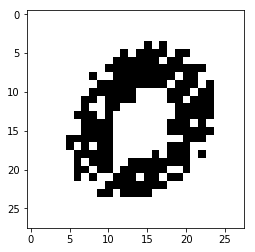

In [28]:
plt.imshow(first_img_binarize, cmap=plt.cm.binary)

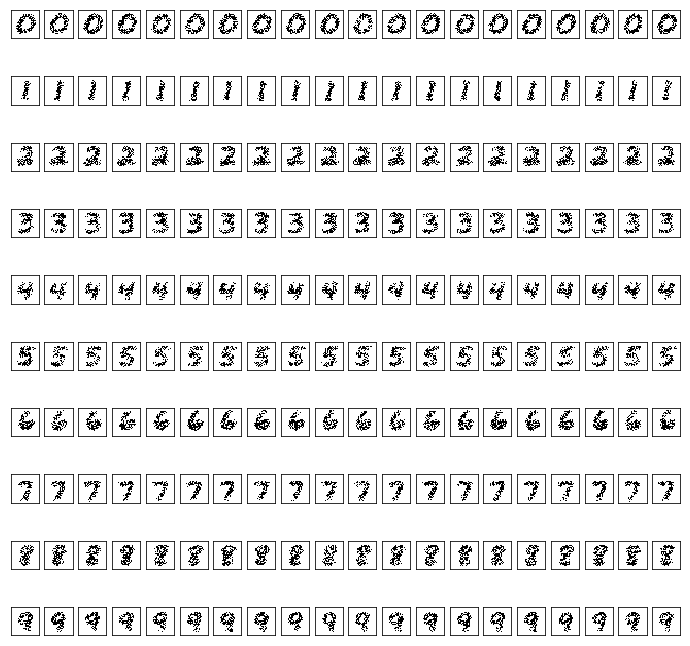

In [29]:
#def P10(num_examples):

### STUDENT START ###
bnb_model2 = BernoulliNB(binarize=0.5, alpha = 0.001)
bnb_model2.fit(mini_train_data, mini_train_labels)
first_img_prob = np.exp(bnb_model2.feature_log_prob_[0]).reshape(28,28)

def P10(num_examples):

    def binarize_pixels(data, threshold=0.2):
        # Initialize a new feature array with the same shape as the original data.
        binarized_pixels = np.zeros(data.shape)

        # Apply a threshold to each feature.
        for feature in range(data.shape[1]):
            binarized_pixels[:,feature] = data[:,feature] > threshold
        return binarized_pixels

    
    np.random.seed(888) #Set seed to get same random probabilities each time
    #Create an empty matrix to store generated images
    generated_matrix = np.array([])
    #Loop through the probabilities for each pixel given a label using the BernoulliNB model from part 8
    for j in range(10): 
        model_prob = np.exp(bnb_model2.feature_log_prob_[j]).reshape(28,28)
        k = 0
        #Generate new images using the product of the model feature probabilities and random probabilities
        while k < 20:
            random_prob = np.random.rand(28,28)
            generated_prob = random_prob*model_prob
            #Binarize the pixels so each pixel is either white or black to create a blurred image
            binarized_prob = binarize_pixels(generated_prob).reshape(784,)
            generated_matrix = np.append(generated_matrix, binarized_prob)
            k += 1
    generated_matrix = generated_matrix.reshape(200,784)
          
    #Create a plot showing the example 20 images for each of the 10 digits
    plt.figure(figsize=(12,12)) 
    for i in range(200):
        plt.subplot(10,20,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(generated_matrix[i].reshape(28,28), cmap=plt.cm.binary)
    return plt.show()

### STUDENT END ###

P10(20)

ANSWER: While the images vary slightly because of the random probabilities generated using np.random.rand(), they look mostly uniform since I generated images using the probabilities generated by the model associated with each pixel for each digit. Because of this, they don't look as varied in shape and size compared to the images from Part 1.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [30]:
buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]
predicted_indices = []

for i in range(1000):
    max_prob = max(bnb_model2.predict_proba(dev_data)[i])
    max_prob_index = np.argmax(bnb_model2.predict_proba(dev_data)[i])
    predicted_indices.append(str(max_prob_index))
    bucket_index = np.digitize(max_prob, buckets)-1
    total[bucket_index] += 1
    if predicted_indices[i] == dev_labels[i]:
        correct[bucket_index] += 1

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =  36    accuracy = 0.389
p(pred) is 0.5000000000000 to 0.9000000000000    total =  90    accuracy = 0.444
p(pred) is 0.9000000000000 to 0.9990000000000    total =  69    accuracy = 0.565
p(pred) is 0.9990000000000 to 0.9999900000000    total =  67    accuracy = 0.672
p(pred) is 0.9999900000000 to 0.9999999000000    total =  50    accuracy = 0.820
p(pred) is 0.9999999000000 to 0.9999999990000    total =  72    accuracy = 0.903
p(pred) is 0.9999999990000 to 0.9999999999900    total =  66    accuracy = 0.894
p(pred) is 0.9999999999900 to 0.9999999999999    total =  23    accuracy = 0.870
p(pred) is 0.9999999999999 to 1.0000000000000    total = 527    accuracy = 0.958


In [31]:
#def P11(buckets, correct, total):
    
### STUDENT START ###
# Create a Naive Bayes model using the alpha value from Part 8
bnb_model2 = BernoulliNB(binarize=0.5, alpha = 0.001)
bnb_model2.fit(mini_train_data, mini_train_labels)
first_img_prob = np.exp(bnb_model2.feature_log_prob_[0]).reshape(28,28)

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

# Create a function that assigns posterior probabilities to a bucket and finds the accuracy for all values in each bucket
def P11(buckets, correct, total):
    predicted_indices = []
    for i in range(1000):
        # Find the highest posterior probability generated by the model for a given image in the dev test set
        max_prob = max(bnb_model2.predict_proba(dev_data)[i])
        max_prob_index = np.argmax(bnb_model2.predict_proba(dev_data)[i])
        predicted_indices.append(str(max_prob_index))
        bucket_index = np.digitize(max_prob, buckets)-1
        total[bucket_index] += 1
        # Compare the predicted labels to the dev set labels
        if predicted_indices[i] == dev_labels[i]:
            correct[bucket_index] += 1

                
### STUDENT END ###

# buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
# correct = [0 for i in buckets]
# total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =  36    accuracy = 0.389
p(pred) is 0.5000000000000 to 0.9000000000000    total =  90    accuracy = 0.444
p(pred) is 0.9000000000000 to 0.9990000000000    total =  69    accuracy = 0.565
p(pred) is 0.9990000000000 to 0.9999900000000    total =  67    accuracy = 0.672
p(pred) is 0.9999900000000 to 0.9999999000000    total =  50    accuracy = 0.820
p(pred) is 0.9999999000000 to 0.9999999990000    total =  72    accuracy = 0.903
p(pred) is 0.9999999990000 to 0.9999999999900    total =  66    accuracy = 0.894
p(pred) is 0.9999999999900 to 0.9999999999999    total =  23    accuracy = 0.870
p(pred) is 0.9999999999999 to 1.0000000000000    total = 527    accuracy = 0.958


ANSWER: The Bernoulli Naive Bayes model I created here appears to be weakly calibrated. The model's accuracy greatly increases for posterior probabilities higher than 90% compared to the accuracies where the probability was less than 90%, e.g. p(pred)=80%. However, I don't believe it is strongly calibrated, since the model must at least by 99.99999% confident to be at least 90% accurate. Further training must be done to determine if the Bernoulli Naive Bayes model can be more accurate.

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [32]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()